## **Pytorch Computer Vision**


## 0. computer vision librairies in PyTorch

`torchvision` - base domain library for PyTorch computer vision

`torchvision.datasets` - get datasets and data loading functions for computer vision here

`torchvision.models` - get pretrained computer vision models that you can leverage for your own problems

`torchvision.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model

`torch.utils.data.Dataset` - Base dataset class for PyTorch.

`torch.utils.data.DataLoader` - Creates a python iterable over a dataset


In [ ]:
#Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor  ##converts images to tensors (numbers)


##Import matplotlib for visualization
import matplotlib.pyplot as plt


##Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## **Getting a dataset**

The dataset we'll be using is FashionMNIST from torch,datasets

In [ ]:
# Setup training data
from torchvision import datasets
train_data =datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, # do we want the training datasets?
    download=True, #do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13499431.62it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269187.78it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4972508.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4281633.35it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
## See the first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
##Check input and output shapes of data

image.shape

torch.Size([1, 28, 28])

### **Visualizing our data**



Image shape: torch.Size([1, 28, 28])


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

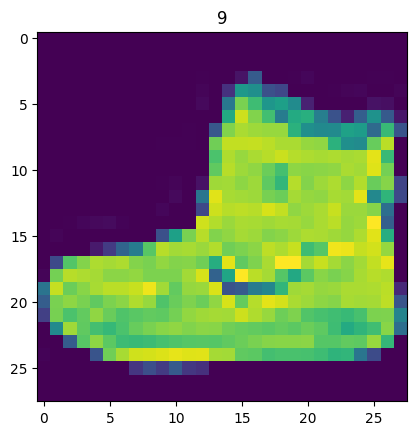

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze());
plt.title(label)
image

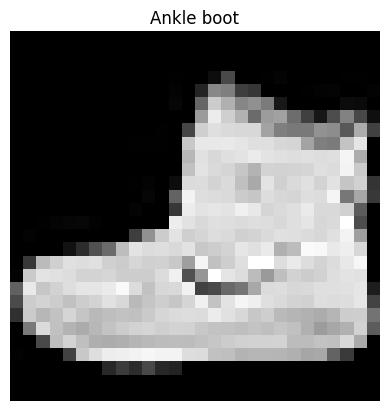

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

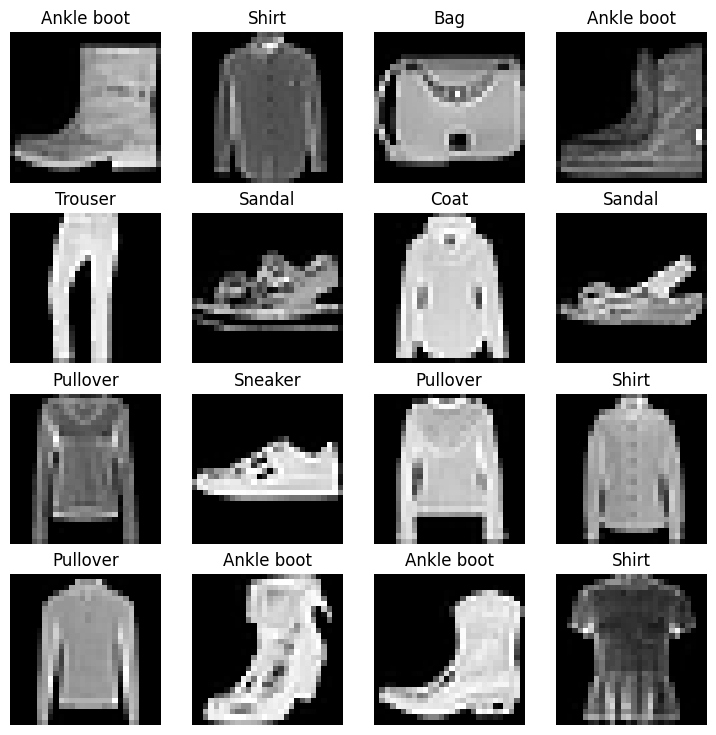

In [ ]:
#Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()

  img,label =train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

***Do you think these items of clothing (images) could be modelled with pure linear line? Or do you think we'll need nonlinearity?***

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

#### **Prepare DataLoader**
Right now, our data is in the form of PyTorch datasets

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?
1. it is more computationally efficient, as in, your computing hardware maynot be able to look (store in memory) at 6000 images in one hit. so we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chance to update its gradients per epoch

In [ ]:
from  torch.utils.data import DataLoader

#Setup thr batch size hyperparameter
BATCH_SIZE = 32

#Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader =DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x783299a53f70>,
 <torch.utils.data.dataloader.DataLoader at 0x783299a53f10>)

In [ ]:
#Let's check out what what we've created
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}.....")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}....")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x783299a53f70>, <torch.utils.data.dataloader.DataLoader object at 0x783299a53f10>)
Length of train_dataloader: 1875 batches of 32.....
Length of test_dataloader: 313 batches of 32....


In [ ]:
## Check out what's inside the training dataloader
train_features_batch,train_labels_batch =next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape



(torch.Size([32, 1, 28, 28]), torch.Size([32]))

6
Image size: torch.Size([1, 28, 28])
Label: 6,label shape: torch.Size([])


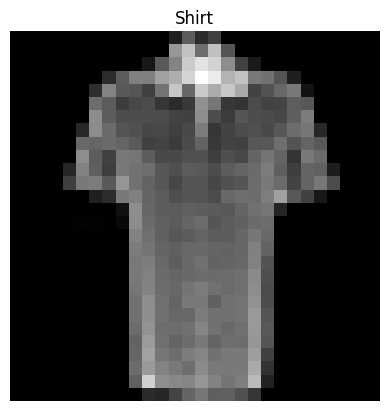

In [ ]:
##Show a sample

torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
print(random_idx)
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label},label shape: {label.shape}")

## **Model 0: Build a baseline model**

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.


In [ ]:
#Creating a flatten layer
flatten_model=nn.Flatten()

#Get a single sample
x=train_features_batch[0]
x.shape


## Flatten the sample
output=flatten_model(x) #perforrm forward pass


# Print out what happend
print(f"Shape before flatten {x.shape} -> [color_channels,height,width]")
print(f"shape after flattenung: {output.shape} -> [color_channels,height*width]")

Shape before flatten torch.Size([1, 28, 28]) -> [color_channels,height,width]
shape after flattenung: torch.Size([1, 784]) -> [color_channels,height*width]


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#setup model with input parameters

model_0 =FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, #how many units in the hideen layer
    output_shape=len(class_names) #one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x).shape


torch.Size([1, 10])

### **3.1 Setup loss, optimizer and evaluation metrics**

* Loss function - since we're working with multi-class data, our loss function will be `nn. CrossEntropyLoss()`

* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skippinng download .....")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [ ]:
##Import accuracy metric

from helper_functions import accuracy_fn

##Setup loss functions and optimizer
loss_fn =nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

#### 3.2 Creating a function to time our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Prints difference between start and end time."""
  total_time=end-start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time




In [ ]:
start_time=timer()
##Some code....
end_time =timer()

print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu:  0.000 seconds


5.174600005375396e-05

## 3.3 **Creating a training loop and training a model on batches of data**

* Loop through epochs

* Loop through training batches, perform training steps, calculate the train loss per batch.

* Loop through testing batches, perform training steps, calculate the train loss per batch

* Print out what's happening

* Time it all (for fun)

In [ ]:
#Import tqdm.auto import tqdm
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu= timer()

#Set the number of epochs (we'll keep this small for faster training time)

epochs=3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ##Training
  train_loss=0
  ##Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    #2. Calculate loss (per batch)
    loss=loss_fn(y_pred,y)
    train_loss+=loss #accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    #Print out what's happening
    if batch % 400 ==0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of dataloader
  train_loss/=len(train_dataloader)


  ### Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred =model_0(X_test)

      # 2. Calcualte loss (accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      #3. Calculate accuracy
      test_acc +=accuracy_fn(y_true=y_test,
                             y_pred=test_pred.argmax(dim=1))

    #Calculate the test loss average per batch
    test_loss/= len(test_dataloader)

    #Calcuate the test acc average per batch
    test_acc /= len(test_dataloader)

  #Print out what's happening
  print(f"\nTrain loss: {train_loss: .4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc: .4f}")

#Calcualte training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters())))





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.5904 | Test loss:  0.5095, Test acc:  82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4763 | Test loss:  0.4799, Test acc:  83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4550 | Test loss:  0.4766, Test acc:  83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.043

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## **4. Make predictions and get Model_0 results**

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #Make predictions
      y_pred=model(X)


      # Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))

    # SCALE LOSS AND ACC TO FIND THE AVERAGE LOSS/ACC PER BATCH
    loss/=len(data_loader)
    acc/=len(data_loader)

  return{"model_name": model.__class__.__name__, # only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
## Setup device agnostic code

In [ ]:
#!nvidia-smi

In [ ]:
#torch.cuda.is_available()

In [ ]:
#Setup device-agnostic code

device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### **6. Model 1: Building a better model with non-linearity**


In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), #flatten inputs into a singular vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()

    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
## Create an instance of model_1

torch.manual_seed(42)
model_1= FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

next(model_1.parameters()).device


device(type='cpu')

### 6.1 Setup loss, Optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* one training loop - train_step()
*testing loop - test_step()


In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):

  """Performs a training with model trying to learn on data_loader."""
  train_loss,train_acc=0,0

  ## Put model into training mode
  model.train()



  ##Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader):
    # Put data on tarhet device
    X,y =X.to(device),y.to(device)


    # 1. Forward pass
    y_pred = model(X)

    #2. Calculate loss and accuracy per batch
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1)) #go from logits -> prediction labels


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train data loader
  train_loss/=len(train_dataloader)
  train_acc/= len(data_loader)
  print(f"Train loss: {train_loss: .5f} | Train acc: {train_acc:.2f}%")





In [ ]:
### Testing

def test_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss,test_acc=0,0

  #Put model in eval mode
  model.eval()


  ## Turn on inference mode context manager
  with torch.inference_mode():
    for X,y in data_loader:

      ## Send the data to the target device
      X,y =X.to(device),y.to(device)

      # 1. Forward pass
      test_pred =model(X)

      # 2. Calcualte loss/acc
      test_loss += loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,
                             y_pred=test_pred.argmax(dim=1)) #go from logits -> prediction labels


    #Adjust metrics and print out
    test_loss/= len(data_loader)
    test_acc /= len(data_loader)
    #Print out what's happenin
    print(f"Test loss: {test_loss: .5f} | Test acc: {test_acc: .2f}%\n")

In [ ]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu =timer()

#set epochs
epochs=3


#Create a optimiziation and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}|n...............")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 =print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0|n...............
Train loss:  1.09199 | Train acc: 61.34%
Test loss:  0.95636 | Test acc:  65.00%

Epoch: 1|n...............
Train loss:  0.78101 | Train acc: 71.93%
Test loss:  0.72227 | Test acc:  73.91%

Epoch: 2|n...............
Train loss:  0.67027 | Train acc: 75.94%
Test loss:  0.68500 | Test acc:  75.02%

Train time on cpu:  37.709 seconds


In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      ##Make our data device agnostic
      X, y=X.to(device),y.to(device)
      #Make predictions
      y_pred=model(X)


      # Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))

    # SCALE LOSS AND ACC TO FIND THE AVERAGE LOSS/ACC PER BATCH
    loss/=len(data_loader)
    acc/=len(data_loader)

  return{"model_name": model.__class__.__name__, # only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc}



In [ ]:
## Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn= accuracy_fn,
                             device=device
                             )

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## **Model 2: Building a Convolutional Neural Network (CNN)**

`https://poloclub.github.io/cnn-explainer/`

In [ ]:
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model frm CNN explainer website.
  """

  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), ##Values we can set ourselves
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 =nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    #print(f"output shape of conv_block_1: {x.shape}")
    x=self.conv_block_2(x)
    #print(f"output shape of conv_block_2: {x.shape}")
    x=self.classifier(x)
    #print(f"output shape of classifier: {x.shape}")
    return x



In [ ]:
torch.manual_seed(42)
model_2 =FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

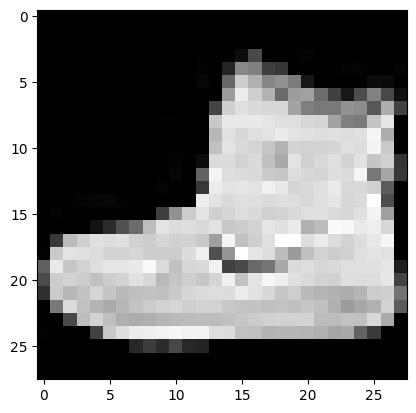

In [ ]:
plt.imshow(image.squeeze(),cmap="gray");

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(image.unsqueeze(0)).to(device)

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

In [ ]:
#model_2.state_dict()

#### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image=images[0]


print(f"Image batch shape: {images.shape}")
print(f"Single image shape {test_image.shape}")



Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape torch.Size([3, 64, 64])


In [ ]:
# Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=1)

#Pass the data through the convulational layer
conv_output =conv_layer(test_image.unsqueeze(0))
conv_output.shape



torch.Size([1, 10, 64, 64])

### **7.2 Stepping through `nn.MaxPool2d()`**

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without  unsqueezed dimension

print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

#Create a sample nn.MaxPool2d layer
max_pool_layer =nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv =conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

##Pass data through the max pool layer
test_image_through_conv_and_max_pool =max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")



Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
#Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

#Create a max pool layer
max_pool_layer =nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### **7.3 Setup a loss function and optimizer for `model2`**

In [ ]:
#Set uo loss function/eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

## **7.4 Training and testing `model_2` using our training and test functions**

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2 =timer()

#Train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n................")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


train_time_end_model_2 =timer()
total_train_time_model_2=print_train_time(start=train_time_end_model_2,
                                          end=train_time_end_model_2,
                                          device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
................
Train loss:  0.59518 | Train acc: 78.38%
Test loss:  0.39500 | Test acc:  85.99%

Epoch: 1
................
Train loss:  0.36536 | Train acc: 86.90%
Test loss:  0.35244 | Test acc:  86.91%

Epoch: 2
................
Train loss:  0.32588 | Train acc: 88.13%
Test loss:  0.32719 | Test acc:  88.07%

Train time on cpu:  0.000 seconds


In [ ]:
# Get model_2_results

model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

# 8.Compare model results and training time

In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])

compare_results


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


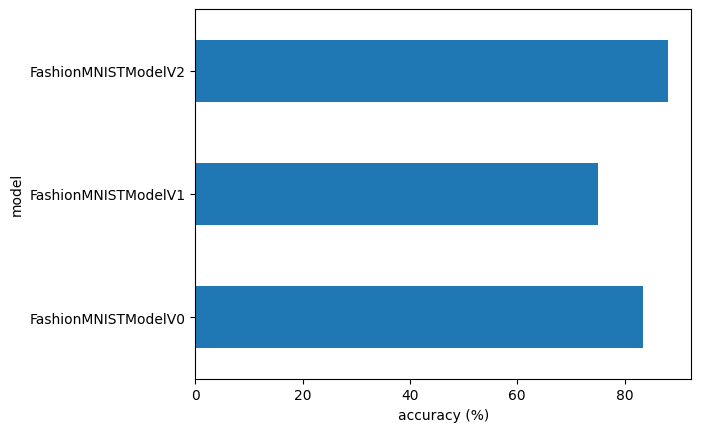

In [ ]:
#Visualize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## **9. Make and evaluate random predictions with the best model**

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare the sample (add a batch dimension and pass to target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass (model outputs raw logits)
      pred_logit =model(sample)

      #Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #Get pred_prob off the GPU for further calcculations
      pred_probs.append(pred_prob.cpu())

#Stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)





In [ ]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

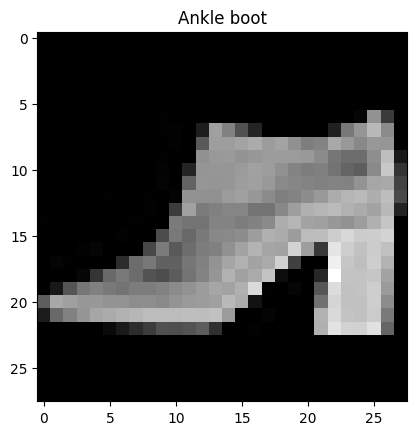

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);

In [ ]:
# Make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

#View first two prediction probabilities
pred_probs[:2]

tensor([[7.2208e-06, 2.3361e-06, 4.7868e-06, 1.6791e-05, 3.1357e-06, 8.5480e-03,
         7.6704e-06, 9.1218e-04, 8.1188e-04, 9.8969e-01],
        [1.6009e-05, 1.7970e-05, 1.4202e-03, 1.8855e-06, 9.9307e-01, 2.4557e-07,
         5.4376e-03, 4.7640e-07, 3.5106e-05, 2.9922e-06]])

In [ ]:
#Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 4, 6, 9, 7, 0, 4, 0, 5])

In [ ]:
test_labels

[9, 4, 2, 9, 7, 6, 4, 0, 5]

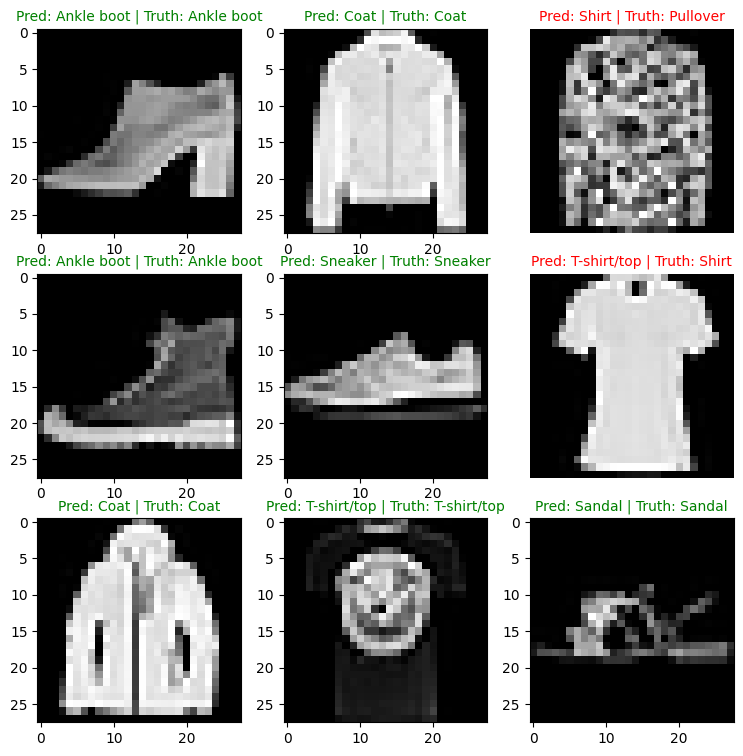

In [ ]:
#Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
  #Creat subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the tarhet image
  plt.imshow(sample.squeeze(),cmap="gray")

  #Find the prediction (in test form, e.g "sandal")
  pred_label=class_names[pred_classes[i]]

  #Get the trith label (in test form)
  truth_label =class_names[test_labels[i]]

  #Create a title for the plot
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"


  #Check for equality between pred and truth and change color of title text
  if pred_label ==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
    plt.axis(False);


## 10. Making a confusion matrix for further orediction evaluation